In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as snb 
%matplotlib inline



In [5]:
# Prepare dataset that includes users' information, movies infromation, and ratings 

#dataset 1: rating information  

columns_rating = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('u.data', sep='\t', names=columns_rating, usecols=range(3), encoding="ISO-8859-1")

#dataset 2: movie information
columns_movie = ['movie_id', 'title']
movies = pd.read_csv('u.item', sep='|', names=columns_movie, usecols=range(2), encoding="ISO-8859-1")


In [7]:
#merge dataset1 and dataset2
#ratings = pd.merge(movies, ratings)
df=pd.merge(ratings, movies, on='movie_id')


In [9]:
#dataset 3: user information
# user id | age | gender | occupation | zip code

columns_users=['user_id','age','gender','occupation', 'zip_code']
users=pd.read_csv('u.user',sep='|',names=columns_users)

# add user information
merged_data=pd.merge(df, users, on='user_id')

In [10]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
merged_data.head()

,user_id,movie_id,rating,title,age,gender,occupation,zip_code
0,196,242,3,Kolya (1996),49,M,writer,55105
1,196,257,2,Men in Black (1997),49,M,writer,55105
2,196,111,4,"Truth About Cats & Dogs, The (1996)",49,M,writer,55105
3,196,25,4,"Birdcage, The (1996)",49,M,writer,55105
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",49,M,writer,55105


In [12]:
merged_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [13]:
#create a coulmn for number of rating next to the "rating" column
# which movie has most rating --> "count" command
merged_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

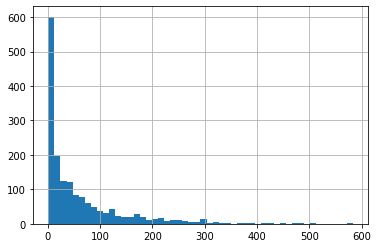

In [17]:
# create a data frame 
avg_ratings=pd.DataFrame(merged_data.groupby('title')['rating'].mean())
#avg_ratings.head()

#create a coulmn for number of rating next to the "rating" column
avg_ratings['num of ratings']=pd.DataFrame(merged_data.groupby('title')['rating'].count())
#avg_ratings.head()
%matplotlib inline
avg_ratings['num of ratings'].hist(bins=50)

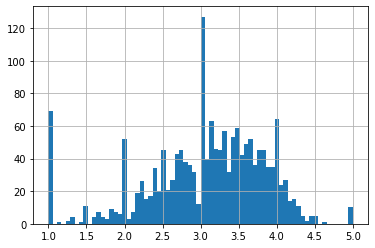

In [18]:
avg_ratings['rating'].hist(bins=70)

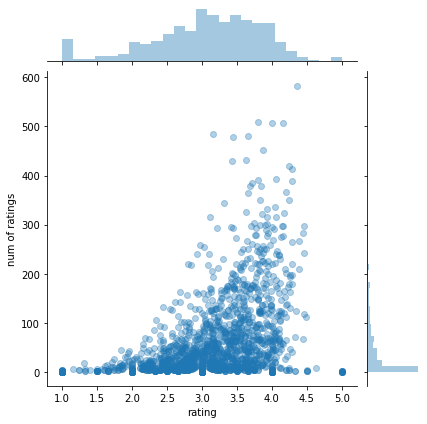

In [19]:
# what the data looks like 
snb.jointplot(x='rating', y='num of ratings', data=avg_ratings, alpha=0.34)

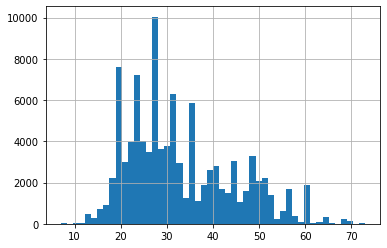

In [20]:
# age of users
merged_data['age'].hist(bins=50)

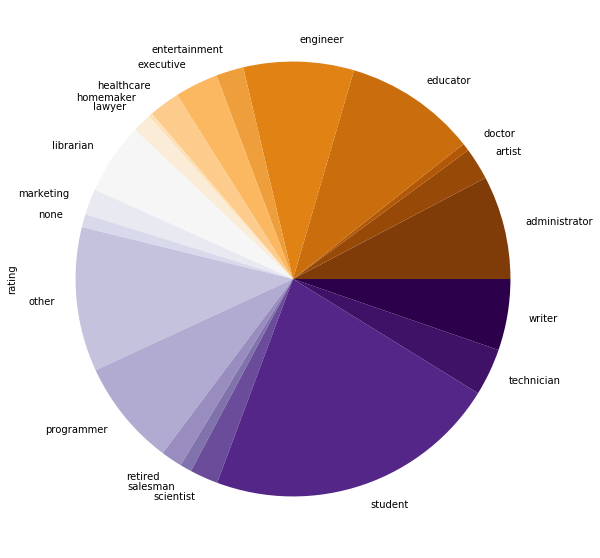

In [21]:
# occupation of users
merged_data.sort_values('rating', ascending=False)
merged_data.groupby(['occupation'])['rating'].sum().plot(
    kind='pie',
    figsize=(15,10),
    cmap=plt.cm.PuOr, 
)

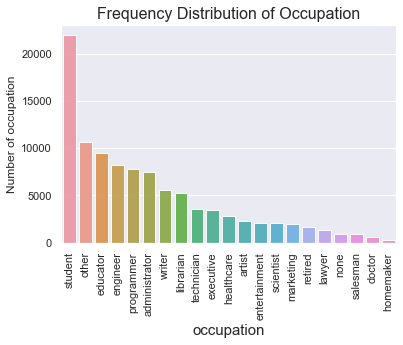

In [33]:
%matplotlib inline
import seaborn as sns
#import matplotlib.pyplot as plt
occupation_count = final_data['occupation'].value_counts()
sns.set(style="darkgrid")
sns.barplot(occupation_count.index, occupation_count.values, alpha=0.9)
plt.title('Frequency Distribution of Occupation', fontsize=16)
plt.ylabel('Number of occupation', fontsize=12)
plt.xlabel('occupation', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

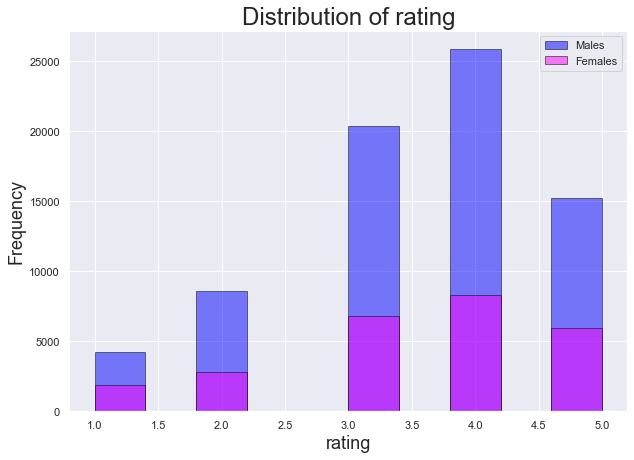

In [35]:
# Histogram of the rating movies males and females

final_data[final_data['gender']==1].rating.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
final_data[final_data['gender']==2].rating.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Distribution of rating', size=24)
plt.xlabel('rating', size=18)
plt.ylabel('Frequency', size=18);

In [34]:
#create a matrix that shows users information as well as their rating for whatever they watched
moviemat=merged_data.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [25]:
#this makes the table more fun!! b/c it gives a better picture of each user!

columns_users=['user_id','age','gender','occupation']
user_movie_table=merged_data.pivot_table(index=columns_users, columns='title', values='rating')

In [26]:
#dataset 3: movie information
columns_movie = ['movie_id', 'title','release_date','VRD','URL','unknown','Action','Adventure','Animation','Children','Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film_Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci_Fi', 'Thriller', 'War', 'Western']
genre = ratings = pd.read_csv('u.item', sep='|', names=columns_movie, usecols=range(24), encoding="ISO-8859-1")
genre.head()

,movie_id,title,release_date,VRD,URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#final_data includes both users information and movie genre 
final_data=pd.merge(merged_data, genre, on='movie_id')
final_data.head()

,user_id,movie_id,rating,title_x,age,gender,occupation,zip_code,title_y,release_date,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),28,M,student,92103,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),25,M,student,53703,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),45,M,other,73132,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#how does rating movies vary among different occupational groups?
#this table seems more informative!! 
#Awesome Possum!!!

groupby_job = final_data.groupby('occupation')
for occupation, value in groupby_job['rating']:
    print((occupation, value.mean()))
    
groupby_job.mean()  

('administrator', 3.6356464768017114)
('artist', 3.653379549393414)
('doctor', 3.688888888888889)
('educator', 3.6706206312221985)
('engineer', 3.541406727828746)
('entertainment', 3.4410501193317424)
('executive', 3.3491037320011756)
('healthcare', 2.896219686162625)
('homemaker', 3.301003344481605)
('lawyer', 3.7353159851301116)
('librarian', 3.560781338896264)
('marketing', 3.4856410256410255)
('none', 3.779134295227525)
('other', 3.5523773797242804)
('programmer', 3.5682604794257147)
('retired', 3.4667495338719703)
('salesman', 3.582943925233645)
('scientist', 3.611273080660836)
('student', 3.5151432345038027)
('technician', 3.5322304620650313)
('writer', 3.3757225433526012)


,user_id,movie_id,rating,age,VRD,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
occupation,,,,,,,,,,,,,,,,,,,,,
administrator,378.662121,406.161653,3.635646,39.123145,NaN,0.000000,0.248429,0.136382,0.027143,0.061773,...,0.012569,0.019655,0.052280,0.047333,0.051477,0.205776,0.125953,0.209921,0.105094,0.022463
artist,492.750867,429.569324,3.653380,30.592288,NaN,0.000000,0.228769,0.134749,0.052426,0.087522,...,0.010399,0.027730,0.044194,0.068024,0.071057,0.200173,0.133449,0.206239,0.097487,0.012565
doctor,392.690741,438.129630,3.688889,35.592593,NaN,0.000000,0.203704,0.105556,0.040741,0.051852,...,0.012963,0.016667,0.033333,0.050000,0.050000,0.246296,0.103704,0.216667,0.081481,0.009259
educator,417.871849,421.898115,3.670621,42.789240,NaN,0.000106,0.207795,0.119466,0.027854,0.062804,...,0.011862,0.021394,0.044588,0.050943,0.056344,0.212455,0.104427,0.187143,0.106439,0.020017
engineer,491.199755,396.114985,3.541407,34.356086,NaN,0.000122,0.278532,0.158899,0.044404,0.076942,...,0.015291,0.017737,0.050642,0.053945,0.044404,0.179450,0.149358,0.209419,0.104954,0.022018
entertainment,312.376134,442.426253,3.441050,28.766110,NaN,0.000477,0.238186,0.118854,0.029594,0.049642,...,0.011933,0.022434,0.091647,0.032458,0.063007,0.163246,0.137947,0.264439,0.083055,0.012888
executive,413.830444,464.360270,3.349104,36.614164,NaN,0.000294,0.237438,0.128122,0.026741,0.068175,...,0.014693,0.017044,0.045548,0.038495,0.059653,0.173964,0.114899,0.238319,0.091684,0.014399
healthcare,497.511769,568.310628,2.896220,38.885164,NaN,0.000000,0.205777,0.115193,0.031740,0.075963,...,0.013552,0.017832,0.042796,0.044936,0.049929,0.177960,0.094864,0.200785,0.082026,0.016762
homemaker,505.127090,439.862876,3.301003,32.371237,NaN,0.000000,0.307692,0.137124,0.030100,0.083612,...,0.010033,0.013378,0.030100,0.050167,0.107023,0.197324,0.100334,0.317726,0.093645,0.000000


In [30]:
# run OLS to see if age is an "effective" factor in rating
# also it seems fancy to run OLS :)

#pip install statsmodels --user
from statsmodels.formula.api import ols

model = ols("rating ~ age", final_data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     297.5
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           1.46e-66
Time:                        11:29:48   Log-Likelihood:            -1.5358e+05
No. Observations:              100000   AIC:                         3.072e+05
Df Residuals:                   99998   BIC:                         3.072e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3551      0.011    312.377      0.0

In [31]:
#final_data includes both users information and movie genre 
final_data=pd.merge(merged_data, genre, on='movie_id')
gender = {'M': 1,'F': 2} 
final_data.gender[final_data.gender == 'M'] = 1
final_data.gender[final_data.gender == 'F'] = 2
final_data.head()

<ipython-input-31-b247ec67a205>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.gender[final_data.gender == 'M'] = 1
<ipython-input-31-b247ec67a205>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.gender[final_data.gender == 'F'] = 2


,user_id,movie_id,rating,title_x,age,gender,occupation,zip_code,title_y,release_date,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),49,1,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),31,1,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),28,1,student,92103,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),25,1,student,53703,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),45,1,other,73132,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#define dummy variables for occupations 
data_logit_model = pd.get_dummies(final_data, columns=['occupation'], prefix = ['occ'])
data_logit_model.head()

,user_id,movie_id,rating,title_x,age,gender,zip_code,title_y,release_date,VRD,...,occ_marketing,occ_none,occ_other,occ_programmer,occ_retired,occ_salesman,occ_scientist,occ_student,occ_technician,occ_writer
0,196,242,3,Kolya (1996),49,1,55105,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,0,0,1
1,63,242,3,Kolya (1996),31,1,75240,Kolya (1996),24-Jan-1997,NaN,...,1,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),28,1,92103,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,1,0,0
3,154,242,3,Kolya (1996),25,1,53703,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,1,0,0
4,306,242,5,Kolya (1996),45,1,73132,Kolya (1996),24-Jan-1997,NaN,...,0,0,1,0,0,0,0,0,0,0


In [37]:
#define outcome variable as binary
data_logit_model.rating[data_logit_model.rating == 1] = 0
data_logit_model.rating[data_logit_model.rating == 2] = 0
data_logit_model.rating[data_logit_model.rating == 3] = 0
data_logit_model.rating[data_logit_model.rating == 4] = 1
data_logit_model.rating[data_logit_model.rating == 5] = 1

<ipython-input-37-3247c5ab5b47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_model.rating[data_logit_model.rating == 1] = 0
<ipython-input-37-3247c5ab5b47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_model.rating[data_logit_model.rating == 2] = 0
<ipython-input-37-3247c5ab5b47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_model.rating[data_logit_model.rating == 3] = 0
<ipython-input-37-3247c5a

In [38]:
data_logit_model.head()

,user_id,movie_id,rating,title_x,age,gender,zip_code,title_y,release_date,VRD,...,occ_marketing,occ_none,occ_other,occ_programmer,occ_retired,occ_salesman,occ_scientist,occ_student,occ_technician,occ_writer
0,196,242,0,Kolya (1996),49,1,55105,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,0,0,1
1,63,242,0,Kolya (1996),31,1,75240,Kolya (1996),24-Jan-1997,NaN,...,1,0,0,0,0,0,0,0,0,0
2,226,242,1,Kolya (1996),28,1,92103,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,1,0,0
3,154,242,0,Kolya (1996),25,1,53703,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,1,0,0
4,306,242,1,Kolya (1996),45,1,73132,Kolya (1996),24-Jan-1997,NaN,...,0,0,1,0,0,0,0,0,0,0


In [41]:
from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm

In [49]:
Y = data_logit_model["rating"]
X = data_logit_model.drop(["rating"], 1)
X = sm.add_constant(X)
model = Probit(Y, X.astype(float))
probit_model = model.fit()
print(probit_model.summary())

         Current function value: 0.669618
         Iterations: 35


/Users/mahdifallahi/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


                          Probit Regression Results                           
Dep. Variable:                 rating   No. Observations:               100000
Model:                         Probit   Df Residuals:                    99958
Method:                           MLE   Df Model:                           41
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                 0.02581
Time:                        11:39:08   Log-Likelihood:                -66962.
converged:                      False   LL-Null:                       -68736.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2688        nan        nan        nan         nan         nan
age                   0.0057      0.000     12.363      0.000       0.005       0.007
gender                0.

/Users/mahdifallahi/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [48]:
data_logit_model.drop(['VRD','URL'], axis=1, inplace=True)
for col in data_logit_model.columns: 
    print(col)

rating
age
gender
unknown
Action
Adventure
Animation
Children
Comedy
Crime
Documentary
Drama
Fantasy
Film_Noir
Horror
Musical
Mystery
Romance
Sci_Fi
Thriller
War
Western
occ_administrator
occ_artist
occ_doctor
occ_educator
occ_engineer
occ_entertainment
occ_executive
occ_healthcare
occ_homemaker
occ_lawyer
occ_librarian
occ_marketing
occ_none
occ_other
occ_programmer
occ_retired
occ_salesman
occ_scientist
occ_student
occ_technician
occ_writer
